## Where was I?

You've read in the data files (both 1 and 2) and split them out into X and y. You plotted them:
- the first dataset is a linearly separable logistic regression problem with two classes
- the second dataset is a circle / target logistic regression problem with two classes (not linearly separable)

You brought in some functions and classes from Week 2 related to linear regression, and you started writing out a skeleton of a LogisticRegression class.

**Next, you need to:**
- finish building out the LogisticRegression class, including placeholders for important functions
- define the hypothesis function for logistic regression
- define the cost function for logistic regression
- define the gradient descent update rule for logistic regression
- implement normalization for logistic regression, or double check that lin reg norm still works
- implement regularization for logistic regression

## Read the Data

In [396]:
data1path = os.path.join('ex2', 'ex2data1.txt')
data2path = os.path.join('ex2', 'ex2data2.txt')

with open(data1path, 'r') as f:
    data1 = np.array([[float(item) for item in row.split(',')] for row in f.read().strip().split('\n')])
X1, y1 = data1[:, :-1], data1[:, -1].astype(int)
with open(data2path, 'r') as f:
    data2 = np.array([[float(item) for item in row.split(',')] for row in f.read().strip().split('\n')])
X2, y2 = data2[:, :-1], data2[:, -1].astype(int)

print(X1.shape, X2.shape)
print(y1.shape, y2.shape)

(100, 2) (118, 2)
(100,) (118,)


## Plot the Data

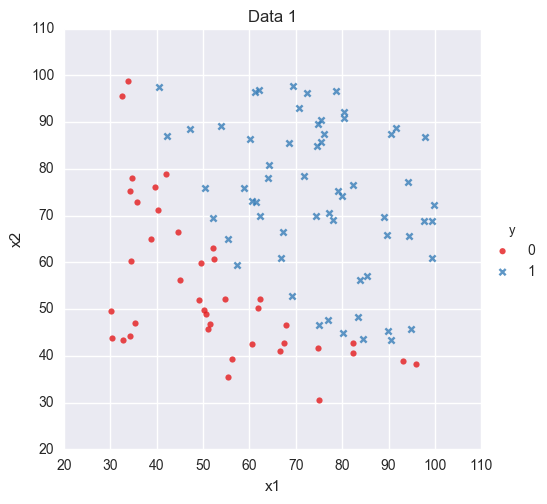

In [397]:
df1 = pd.DataFrame(data1, columns=['x1', 'x2', 'y'])
df1['y'] = df1['y'].astype('int')
sns.lmplot(x='x1', y='x2', hue='y', data=df1, fit_reg=False, markers=["o", "x"], palette="Set1")
plt.title('Data 1')

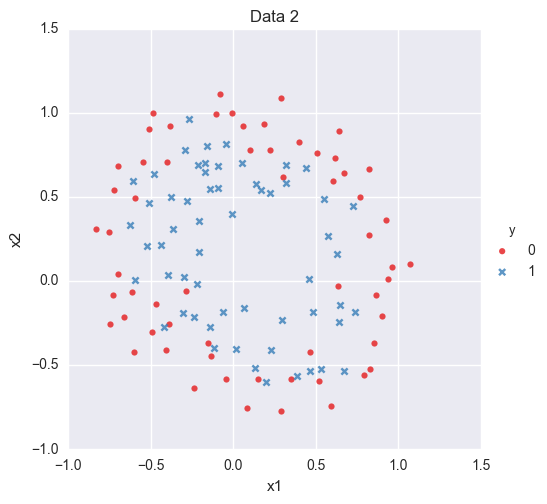

In [398]:
df2 = pd.DataFrame(data2, columns=['x1', 'x2', 'y'])
df2['y'] = df2['y'].astype('int')
sns.lmplot(x='x1', y='x2', hue='y', data=df2, fit_reg=False, markers=["o", "x"], palette="Set1")
plt.title('Data 2')

In [399]:
class LogisticRegression:
    
    def __init__(self, normalization=None, tol=0.0001, alpha=0.01):
        self.normalization = normalization
        self.tol = tol
        self.alpha = alpha
        self.X = None
        self.y = None
        self.theta = None
        self.all_costs = []
    
    def fit(self, X, y):
        # Add x0 feature of all 1's.
        self.X = np.concatenate((np.ones(len(X))[:, None], X), axis=1)
        self.y = y
        
        # Set up parameter theta
        self.theta = np.zeros(self.X.shape[1])
        
        # Run gradient descent
        #self.theta = self._gradient_descent(self.theta)
    
    def _gradient_descent(self, theta):
        previous_cost = float('inf')
        current_cost = self._cost(theta)
        self.all_costs.append(current_cost)
        
        while abs(previous_cost - current_cost) > self.tol:
            if current_cost > previous_cost:
                raise Exception('Diverging gradient descent, try a smaller alpha.')
            theta = self._update_theta(theta)
            previous_cost = current_cost
            current_cost = self._cost(theta)
            self.all_costs.append(current_cost)
        
        return theta    
    
    def _hypothesis(self, theta):
        return 1 / (1 + np.e ** (-1 * self.X.dot(theta)))
    
    def _cost(self, theta):
        h = self._hypothesis(theta)
        m = self.X.shape[0]
        J = (1 / m) * (-1 * self.y.dot(np.log(h)) - (1 - self.y).dot(np.log(1 - h)))
        
        return J
    
    def _update_theta(self, theta):
        h = self._hypothesis(theta)
        m = self.X.shape[0]
        return theta - (self.alpha / m) * self.X.T.dot(h - self.y)
    
    def predict(self, X):
        pass

In [400]:
X = np.concatenate((np.ones(X1.shape[0])[:, None], X1), axis=1)
y = y1
theta = np.zeros(X.shape[1])

def hypothesis(X, theta):
    return 1 / (1 + np.e ** (-1 * X.dot(theta)))

def cost(X, y, theta, hypothesis_func):
    h = hypothesis_func
    # if y=1
    #-log(h(x))
    
    # if y=0
    #-log(1-h(x))
    
    # put together
    return (1 / X.shape[0]) * sum((-y)*(np.log(h(X, theta))) - (1-y)*(np.log(1-h(X, theta))))

def update_theta(X, y, theta, alpha, hypothesis_func):
    h = hypothesis_func
    
    return theta - (alpha / X.shape[0]) * sum(X * (h(X, theta) - y)[:, None])

# Add predictions to the X array
df = pd.DataFrame(
    np.concatenate((X, hypothesis(X, theta)[:, None], y[:, None]), axis=1),
    columns=['x0', 'x1', 'x2', 'prediction', 'y']
)
df['y'] = df['y'].astype(int)
df.head()

cost(X, y, theta, hypothesis)
for x in range(1000):
    theta = update_theta(X, y, theta, alpha=0.1, hypothesis_func=hypothesis)
print(theta)
X
y

[-7.68168093  3.70121015 -1.14959658]


array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1])

In [402]:
def update_theta(X, y, theta, alpha, hypothesis_func):
    h = hypothesis_func
    
    return theta - (alpha / X.shape[0]) * X.T.dot(h(X, theta) - y)

theta = np.zeros(X.shape[1])
thetas = []
all_costs = []
all_everything = []
for x in range(10000):
    
    theta = theta - (alpha / len(X)) * X.T.dot(h(X, theta) - y)
    thetas.append(theta)
    all_costs.append(cost(X, y, theta, hypothesis))
    all_everything.append((theta, cost(X, y, theta, hypothesis)))
    
print(all_everything)

[(array([ 0.01      ,  1.20092166,  1.12628422]), nan), (array([-0.03      , -0.88037039, -1.05853146]), 86.457303155353856), (array([ 0.03      ,  3.60276498,  3.37885266]), nan), (array([-0.01      ,  1.52147293,  1.19403698]), nan), (array([-0.05      , -0.55981911, -0.99077871]), 69.092105547154048), (array([ 0.01      ,  3.92331625,  3.44660542]), nan), (array([-0.03      ,  1.84202421,  1.26178974]), nan), (array([-0.07      , -0.23926784, -0.92302595]), 51.726907938954241), (array([-0.01      ,  4.24386752,  3.51435818]), nan), (array([-0.05      ,  2.16257548,  1.32954249]), nan), (array([-0.09      ,  0.08128344, -0.85527319]), 34.361710330772155), (array([-0.03      ,  4.5644188 ,  3.58211093]), nan), (array([-0.07      ,  2.48312675,  1.39729525]), nan), (array([-0.11      ,  0.40183471, -0.78752043]), 17.281614880374722), (array([-0.05690056,  4.27709358,  3.37200798]), nan), (array([-0.09690056,  2.19580154,  1.1871923 ]), nan), (array([-0.13690056,  0.11450949, -0.9976233

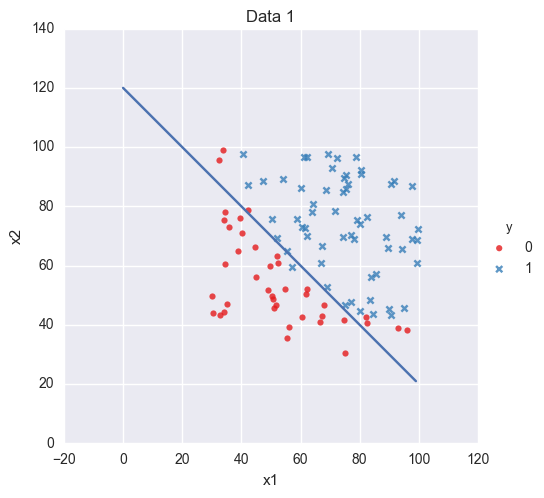

In [172]:
df1 = pd.DataFrame(data1, columns=['x1', 'x2', 'y'])
df1['y'] = df1['y'].astype('int')
sns.lmplot(x='x1', y='x2', hue='y', data=df1, fit_reg=False, markers=["o", "x"], palette="Set1")
plt.title('Data 1')
theta = [120,-1,-1]
lineplot = [(-theta[0]-theta[1]*x)/theta[2] for x in range(100)]
plt.plot(lineplot)

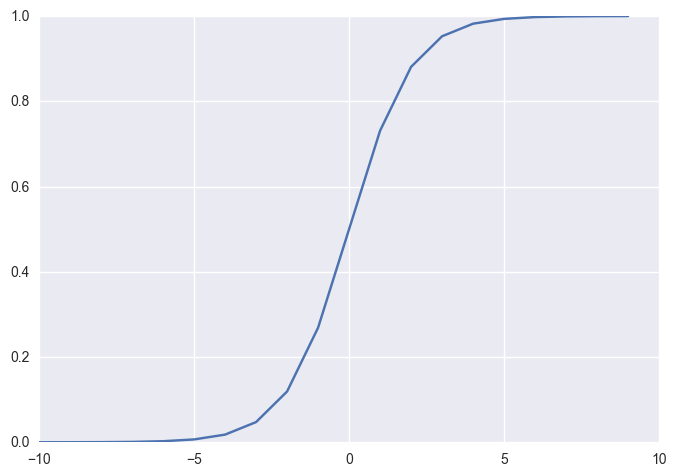

In [218]:
# Sigmoid / Logistic Function
def g(x):
    return 1 / (1 + np.e ** (-x))

# Logistic Regression Hypothesis Function
def h(X, theta):
    return g(X.dot(theta))

# Logistic Regression Cost Function
def cost(X, y, theta):
    return (-1 / len(X)) * sum(y*np.log(h(X, theta)) + (1-y)*np.log(1-h(X, theta)))

plt.plot(range(-10,10), [g(x) for x in range(-10,10)])

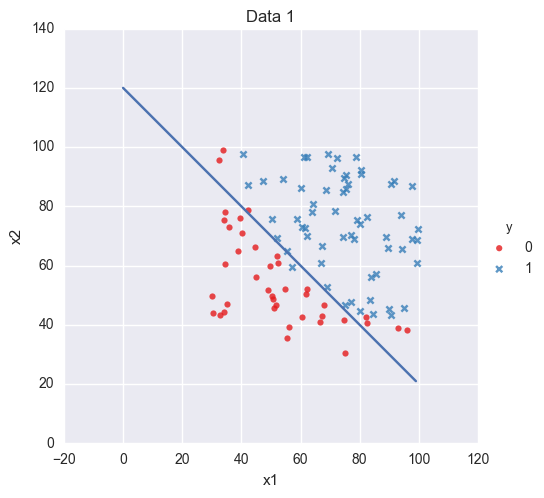

In [239]:
thetas_to_try = []
for i in range(-5,5):
    for j in range(-5,5):
        for k in range(-5,5):
            thetas_to_try.append([i,j,k])

all_costs = []
for t in thetas_to_try:
    all_costs.append((t, cost(X, y, t)))

min_theta = min(all_costs, key=lambda x: x[1])[0]

df1 = pd.DataFrame(data1, columns=['x1', 'x2', 'y'])
df1['y'] = df1['y'].astype('int')
sns.lmplot(x='x1', y='x2', hue='y', data=df1, fit_reg=False, markers=["o", "x"], palette="Set1")
plt.title('Data 1')
plt.plot(range(100), [(-theta[0] - theta[1]*x)/theta[2] for x in range(100)])

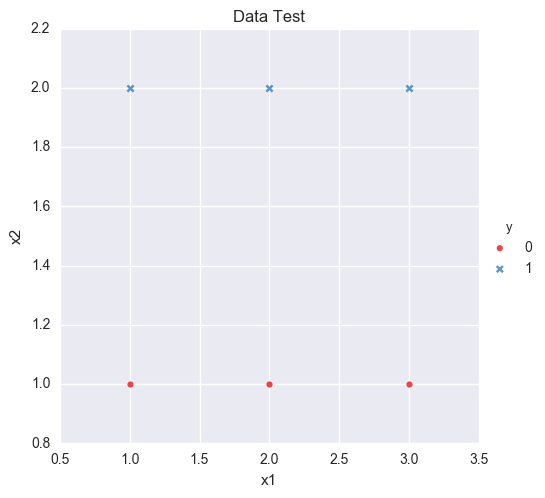

In [234]:
X_test = np.array([[1,1,1],[1,2,1],[1,3,1],[1,1,2],[1,2,2],[1,3,2]])
y_test = np.array([0,0,0,1,1,1])

data_test = np.concatenate((X_test, y_test[:, None]), axis=1)

df_test = pd.DataFrame(data_test[:, 1:], columns=['x1', 'x2', 'y'])
df_test['y'] = df_test['y'].astype('int')
sns.lmplot(x='x1', y='x2', hue='y', data=df_test, fit_reg=False, markers=["o", "x"], palette="Set1")
plt.title('Data Test')

In [355]:
thetas_to_try = []
for i in range(-5,5):
    for j in range(-5,5):
        for k in range(-5,5):
            thetas_to_try.append([i,j,k])

all_costs = []
for t in thetas_to_try:
    all_costs.append((t, cost(X_test, y_test, t)))

min_theta: [-4, -1, 4]


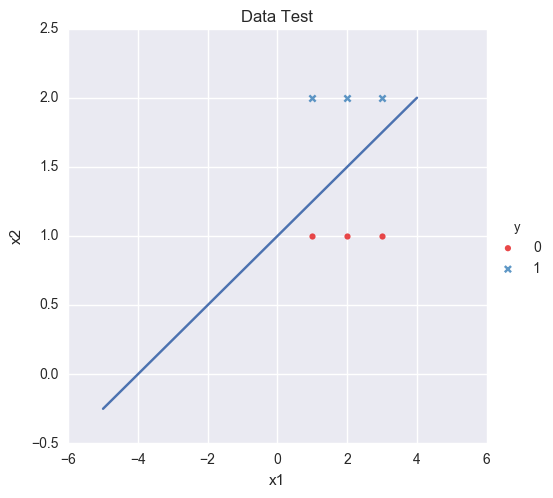

In [356]:
min_theta = min(all_costs, key=lambda x: x[1])[0]
print('min_theta: {}'.format(min_theta))

df_test = pd.DataFrame(data_test[:, 1:], columns=['x1', 'x2', 'y'])
df_test['y'] = df_test['y'].astype('int')
sns.lmplot(x='x1', y='x2', hue='y', data=df_test, fit_reg=False, markers=["o", "x"], palette="Set1")
plt.title('Data Test')

plt.plot(range(-5,5), [1 + .25*x for x in range(-5,5)])

## Troubleshooting Notes

After doing some extensive troubleshooting, it looks like the trouble might be with my theta update. My X and y setup appear to be correct, and by randomly generating thetas and calculating the costs I can get a reasonable theta parameter just by looking at the minimum cost, and plotting everything appears to work.

So now I need to dive into the theta update rule and see what's happening.

In [403]:
# Sigmoid / Logistic Function
def g(x):
    return 1 / (1 + np.e ** (-x))

# Logistic Regression Hypothesis Function
def h(X, theta):
    return g(X.dot(theta))

# Logistic Regression Cost Function
def cost(X, y, theta):
    return (-1 / len(X)) * sum(y*np.log(h(X, theta)) + (1-y)*np.log(1-h(X, theta)))

# TROUBLESHOOTING
# This is the part I need to take care to doublecheck
def theta_update(X, y, theta, alpha):
    #return theta - (alpha / len(X)) * X.T.dot(h(X, theta) - y)
    #return theta - ((alpha / len(X)) * sum(X * (h(X, theta)-y)[:, None]))
    return theta - (alpha / len(X)) * X.T.dot((h(X, theta) - y))

X = X_test
y = y_test

theta = np.zeros(X.shape[1])
thetas = [(theta, cost(X, y, theta))]

for x in range(1000000):
    alpha = 0.1
    theta = theta - (alpha / len(X)) * X.T.dot(h(X, theta) - y)
    #thetas.append((theta, cost(X, y, theta)))

print(theta)
np.set_printoptions(suppress=True)
h(X, [-4,-1,4])
cost(X, y, [-4,-1,4])
theta_update(X, y, [-3,-1,3], 1)
X.T.dot((h(X, theta) - y))
theta - (0.1 / len(X)) * X.T.dot(h(X, theta) - y)

print(cost(X, y, [-4,-1,4]))
print(cost(X, y, [-11,-0.77,9]))
print(cost(X, y, [-18.78590451,-0.75819721,13.69186671]))

[-25.7206535   -0.75671262  18.31275335]
0.162925683378
0.0196797347048
0.00131194927389


## Reference from Week 2

In [55]:
def gradient_descent_linear_regression(X, y, alpha=0.01):
    iterations = 0
    theta = np.zeros(X.shape[1])
    previous_cost = math.inf
    current_cost = cost_function(X, y, theta)
    all_costs = [current_cost]
    cont = True
    f, (ax1) = plt.subplots(1)

    while cont:
        iterations += 1
        theta = theta - (alpha / len(X)) * sum(X * (X.dot(theta)-y)[:, None])
        previous_cost = current_cost
        current_cost = cost_function(X, y, theta)
        all_costs.append(current_cost)
        
        if iterations % 10000 == 0:
            print('iteration #{}\ncurrent: {:+.4f}\tdiff_prev: {:+.4f}'.format(iterations, current_cost, current_cost-previous_cost))
            sns.regplot(np.array(range(len(all_costs))), np.array(all_costs), fit_reg=False)
            if input('continue? (y/n) ') == 'y':
                pass
            else:
                cont = False

    return theta


def cost_function_linear_regression(X, y, theta):
    m = len(y)

    return (1/(2*m)) * sum((X.dot(theta) - y)**2)


def linear_regression(X, y, method='normal_equation', **kwargs):
    if method=='normal_equation':
        return normal_equation(X, y)
    elif method=='gradient_descent':
        return gradient_descent(X, y, **kwargs)


class NormalizerLinearRegression:

    def __init__(self):
        self.X = None
        self.X_transformed = None
        self.X_mean = None
        self.X_stdev = None

    def fit(self, X):
        self.X = X
        self.X_mean = self.X.mean(axis=0)
        self.X_mean[0] = 0
        self.X_stdev = self.X.std(axis=0)
        self.X_stdev[0] = 1
        self.X_transformed = (self.X - self.X_mean) / self.X_stdev

    def fit_transform(self, X):
        self.fit(X)
        return self.X_transformed

    def get_transformed(self):
        return self.X_transformed
    
    def transform(self, X):
        return (X - self.X_mean) / self.X_stdev
    
    def unfit_theta(self, theta):
        """
        Converts the parameters from the normalized space back to the original space.
        
        Input: list theta
        Output: list
        
        This equation can be verified by looking at a normalized example [1, (x1 - x1_mean)/x1_std, (x2 - x2_mean)/x2_std, ...],
        multiplying this example by parameters [theta_0, theta_1, theta_2, ...] to get prediction y,
        and then rearranging terms to leave the individual x terms not normalized and all the constants grouped
        under a new theta_0.
        """
        theta_0 = theta[0] - sum(theta[1:]*self.X_mean[1:]/self.X_stdev[1:])
        theta_rest = theta[1:]/self.X_stdev[1:]
        return [theta_0, *theta_rest]